In [ ]:
import pandas
import plotly.express as px
data = pandas.read_csv("resultss.csv")

fig = px.density_mapbox(data, z = "DownloadSpeed", lat = "Latitude", lon = "Longitude", hover_name = "Date", hover_data = ["DownloadSpeed", "DownloadByte", "UploadSpeed", "UploadByte", "Latency"], color_continuous_scale=px.colors.sequential.Rainbow, zoom = 7, height = 500)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
data = pd.read_csv("Vis_temp2.csv")

fig = px.scatter_mapbox(data, lat = "lat", lon = "lon", hover_name = "Date", hover_data = ["download", "download bit", "upload", "upload bit", "Delay"], color = "upload", color_continuous_scale=px.colors.sequential.Rainbow, zoom = 7, height = 500)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas
import plotly.express as px
data = pandas.read_csv("Vis_temp2.csv")

fig = px.scatter_mapbox(data, lat = "lat", lon = "lon", hover_name = "Date", hover_data = ["download", "download bit", "upload", "upload bit", "Delay"], color = "Delay", color_continuous_scale=px.colors.sequential.Rainbow, zoom = 7, height = 500)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas
import plotly.express as px

pandas.set_option('display.precision', 9)

data = pandas.read_csv("currResults.csv")

print((data["Lat"][1]))

fig = px.density_mapbox(data, z = "Download Speed", lat = "Lat", lon = "Lon", hover_name = "Date", hover_data = {"Lat":":.8f", "Lon":":.8f", "ConnType":True, "Download Speed":True, "Download Size":True, "Upload Speed":True, "Upload Size":True, "Latency":True, 'Altitude(ft)':True}, color_continuous_scale=px.colors.sequential.Rainbow, zoom = 7, height = 500)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()
pandas.get_option('display.precision')

42.35026861


9

In [ ]:
import plotly.express as px
import pandas

pandas.set_option('display.precision', 9)

dataset = pandas.read_csv("currResults.csv")

fig = px.scatter_3d(dataset, x='Lat', y='Lon', z= 'Altitude(ft)', color='Download Speed')
fig.show()

In [ ]:
pip install basemap

     |████████████████████████████████| 862 kB 4.6 MB/s 
     |████████████████████████████████| 219 kB 18.8 MB/s 
     |████████████████████████████████| 30.5 MB 1.4 MB/s 
     |████████████████████████████████| 6.3 MB 50.9 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=8a99f3dfce4060f0c2ecd49323af3115b8dde446f0426f5292734b002dc637ec
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


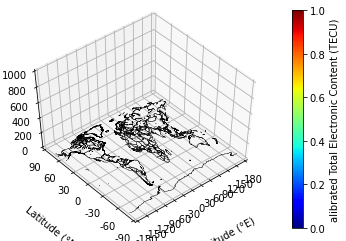

In [ ]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset

fig = plt.figure()
ax = fig.gca(projection='3d')

# Define lower left, uperright lontitude and lattitude respectively
extent = [-180, 180, -90, 90]
# Create a basemap instance that draws the Earth layer
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             projection='cyl', resolution='l', fix_aspect=False, ax=ax)
# Add Basemap to the figure
ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
ax.add_collection3d(bm.drawcountries(linewidth=0.35))
ax.view_init(azim=230, elev=50)
ax.set_xlabel('Longitude (°E)', labelpad=20)
ax.set_ylabel('Latitude (°N)', labelpad=20)
ax.set_zlabel('Altitude (km)', labelpad=20)
# Add meridian and parallel gridlines
lon_step = 30
lat_step = 30
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
ax.set_yticks(parallels)
ax.set_yticklabels(parallels)
ax.set_xticks(meridians)
ax.set_xticklabels(meridians)
ax.set_zlim(0., 1000.)

# empty array for place holder
lons = np.array([]) # longtitude
lats = np.array([]) # latitude
msl_alt = np.array([]) # altitude
elec_dens = np.array([]) # electron density
tec_cal = np.array([]) # calibrated total electron content

# Make sure your working directory is the directory contains this script and the data file.
directory = os.fsencode('.')

# Import data to illustrate
for i, file in enumerate(os.listdir(directory)):
    filename = os.fsdecode(file)
    if (filename.startswith("ionPrf") and i < 20):
        # print(os.path.join(directory, filename))
        ###
        fh = Dataset(filename, mode='r')
        lons = np.concatenate([lons, fh.variables['GEO_lon'][:]])
        lats = np.concatenate([lats, fh.variables['GEO_lat'][:]])
        elec_dens = np.concatenate([elec_dens, fh.variables['ELEC_dens'][:]])
        elec_dens_unit = fh.variables['ELEC_dens'].units
        tec_cal = np.concatenate([tec_cal, fh.variables['TEC_cal']])
        tec_unit = fh.variables['TEC_cal'].units
        msl_alt = np.concatenate([msl_alt, fh.variables['MSL_alt'][:]])
        fh.close()

# scatter map based on lons, lats, alts and color based on the total electron content.
p = ax.scatter(lons, lats, msl_alt, c=tec_cal, cmap='jet')
# Add a colorbar to reference the intensity
fig.colorbar(p, label='alibrated Total Electronic Content (TECU)')

plt.show()